# Explore here

In [1]:
#pip install statsmodels
#!pip install StandardScaler
#!pip install "dask[distributed]"
#!pip install imbalanced-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
#from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
import requests
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.datasets import fetch_california_housing


In [3]:
# Your code here
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print(df.shape)
df.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
unique_var = df.nunique()==1

if any(unique_var): 
    for col in unique_var.index[unique_var] : print(f"The variable {i} content only one category.")
else: print(f"There's no variable with only one category.")

There's no variable with only one category.


In [6]:
aux = df.nunique().sort_values().head()
aux1 = df.nunique().sort_values().tail()
print(f''' 
      Unique values sorted head(5):
      
      {aux}
      
      Unique values sorted tail(5)
      
      {aux1}
      ''')


 
      Unique values sorted head(5):
      
      Outcome           2
Pregnancies      17
BloodPressure    47
SkinThickness    51
Age              52
dtype: int64
      
      Unique values sorted tail(5)
      
      Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64
      


In [7]:
print(f'Number of duplicated values: {df.duplicated().sum()}') 

Number of duplicated values: 0


In [8]:
print(f'Number of NaN values: {df.isna().sum().sum()}') 

Number of NaN values: 0


In [9]:
aux = list(df.columns[df.dtypes=='object'])
print(f'Columns dtypes == "object": {aux}')

Columns dtypes == "object": []


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
print(df.Outcome.sum()/df.Outcome.count()) #Solo de curioso

0.3489583333333333


In [12]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Text(0, 0.5, 'count')

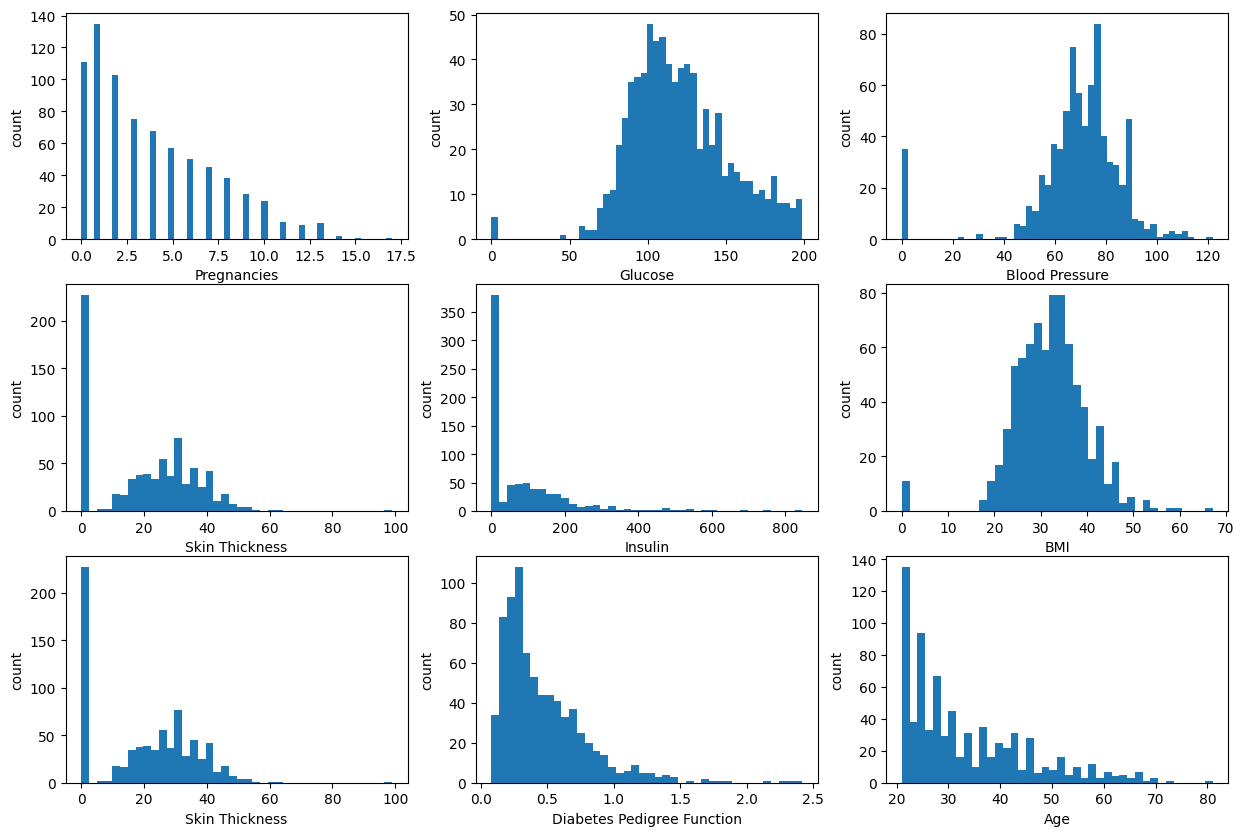

In [13]:
#para hacerme una idea de las distribuciones segun c/valor numerico
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 10))

ax1.hist(df['Pregnancies'], bins=50)
ax1.set_xlabel('Pregnancies')
ax1.set_ylabel('count')

ax2.hist(df['Glucose'], bins=50)
ax2.set_xlabel('Glucose')
ax2.set_ylabel('count')

ax3.hist(df['BloodPressure'], bins=50)
ax3.set_xlabel('Blood Pressure')
ax3.set_ylabel('count')

ax4.hist(df['SkinThickness'], bins=40)
ax4.set_xlabel('Skin Thickness')
ax4.set_ylabel('count')

ax5.hist(df['Insulin'], bins=40)
ax5.set_xlabel('Insulin')
ax5.set_ylabel('count')

ax6.hist(df['BMI'], bins=40)
ax6.set_xlabel('BMI')
ax6.set_ylabel('count')

ax7.hist(df['SkinThickness'], bins=40)
ax7.set_xlabel('Skin Thickness')
ax7.set_ylabel('count')

ax8.hist(df['DiabetesPedigreeFunction'], bins=40)
ax8.set_xlabel('Diabetes Pedigree Function')
ax8.set_ylabel('count')

ax9.hist(df['Age'], bins=40)
ax9.set_xlabel('Age')
ax9.set_ylabel('count')

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)


In [15]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
1,Glucose,26.524872
7,Age,19.383192
5,BMI,15.504562
4,Insulin,9.141990
6,DiabetesPedigreeFunction,9.108819
2,BloodPressure,8.452155
0,Pregnancies,6.055261
3,SkinThickness,5.829150


All variables are relevant and should be considered

In [16]:
'''
Obtenemos los valores de inflación de la varianza a partir de la matriz de correlaciones. 
Esto nos ayuda a identificar aquellas variables que presentan correlación con otras en nuestro dataset; 
esto es importante ya que debemos siempre que sea posible evitar la redundancia en los datos con el fin de 
mejorar la capacidad predictiva y de generalización de nuestros modelos. 
Un buen punto de corte para el vif suele ser 10. Un vif infinito implica una correlación perfecta.
'''
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

Pregnancies                 3.675205
Glucose                     3.027733
BloodPressure               1.732300
SkinThickness               4.225804
Insulin                     3.750100
BMI                         2.440668
DiabetesPedigreeFunction    1.297097
Age                         4.888001
dtype: float64

In [17]:
# matriz de correlaciones segun VIF
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y
Pregnancies,1.000,0.139,0.158,-0.073,-0.074,0.036,-0.023,0.548,0.207
Glucose,0.139,1.000,0.156,0.024,0.348,0.210,0.158,0.259,0.473
BloodPressure,0.158,0.156,1.000,0.162,0.069,0.225,0.034,0.241,0.089
SkinThickness,-0.073,0.024,0.162,1.000,0.421,0.377,0.172,-0.151,0.070
Insulin,-0.074,0.348,0.069,0.421,1.000,0.178,0.161,-0.046,0.126
BMI,0.036,0.210,0.225,0.377,0.178,1.000,0.123,0.018,0.315
DiabetesPedigreeFunction,-0.023,0.158,0.034,0.172,0.161,0.123,1.000,0.026,0.147
Age,0.548,0.259,0.241,-0.151,-0.046,0.018,0.026,1.000,0.285
y,0.207,0.473,0.089,0.070,0.126,0.315,0.147,0.285,1.000


None of variables seems to be correlated with another one in a significant way. We may proceed with all variables

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X_train = df.drop(["Outcome"], axis = 1)
y_train = df["Outcome"]
X_test = df.drop(["Outcome"], axis = 1)
y_test = df["Outcome"]

In [20]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
y_pred = model.predict(X_test)
y_pred[:15]

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.])

In [22]:

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 0.0


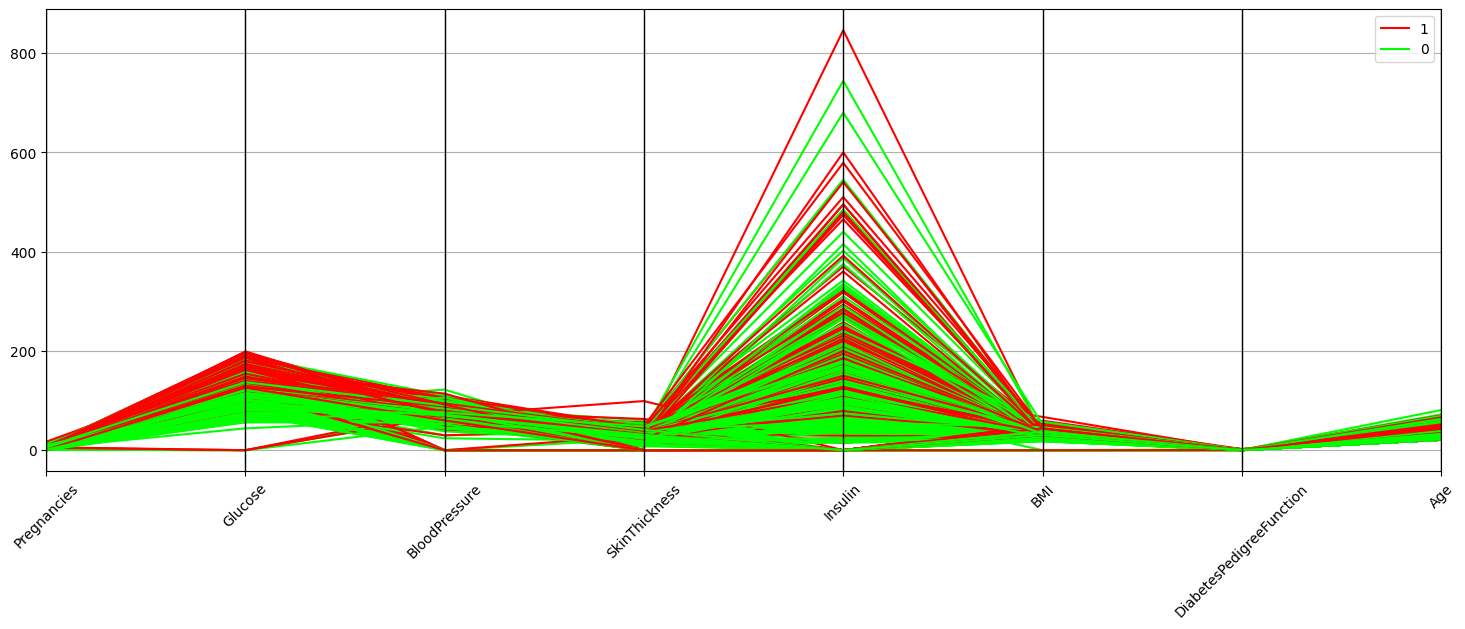

In [23]:
plt.figure(figsize=(18, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'lime'])
plt.xticks(rotation=45)
plt.show()

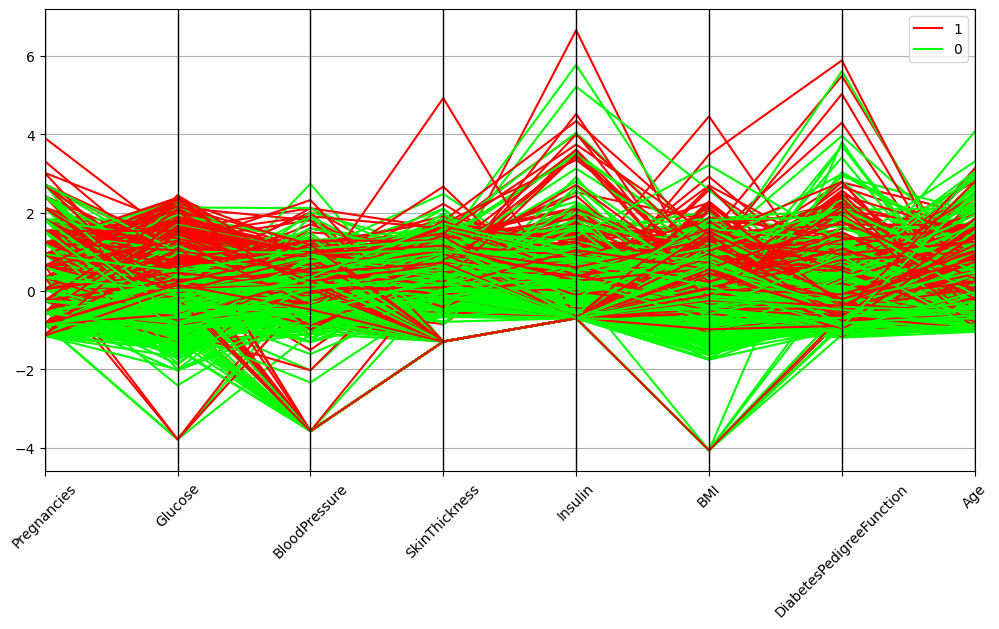

In [24]:
scaler = StandardScaler()
data_sc = pd.DataFrame(data=scaler.fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
data_sc['Outcome'] = df.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'lime'])
plt.xticks(rotation=45)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = tts(df.drop('Outcome', axis=1), df.Outcome, test_size=0.2, random_state=42)

In [26]:
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
simple_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42).fit(X_train, y_train)

y_pred_train_complex = complex_tree.predict(X_train)
y_pred_test_complex = complex_tree.predict(X_test)

y_pred_train_simple = simple_tree.predict(X_train)
y_pred_test_simple = simple_tree.predict(X_test)

In [27]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [28]:
print(f'Complex Tree: ')
get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)

Complex Tree: 


,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


In [29]:
print(f'Simple Tree: ')
get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)

Simple Tree: 


,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


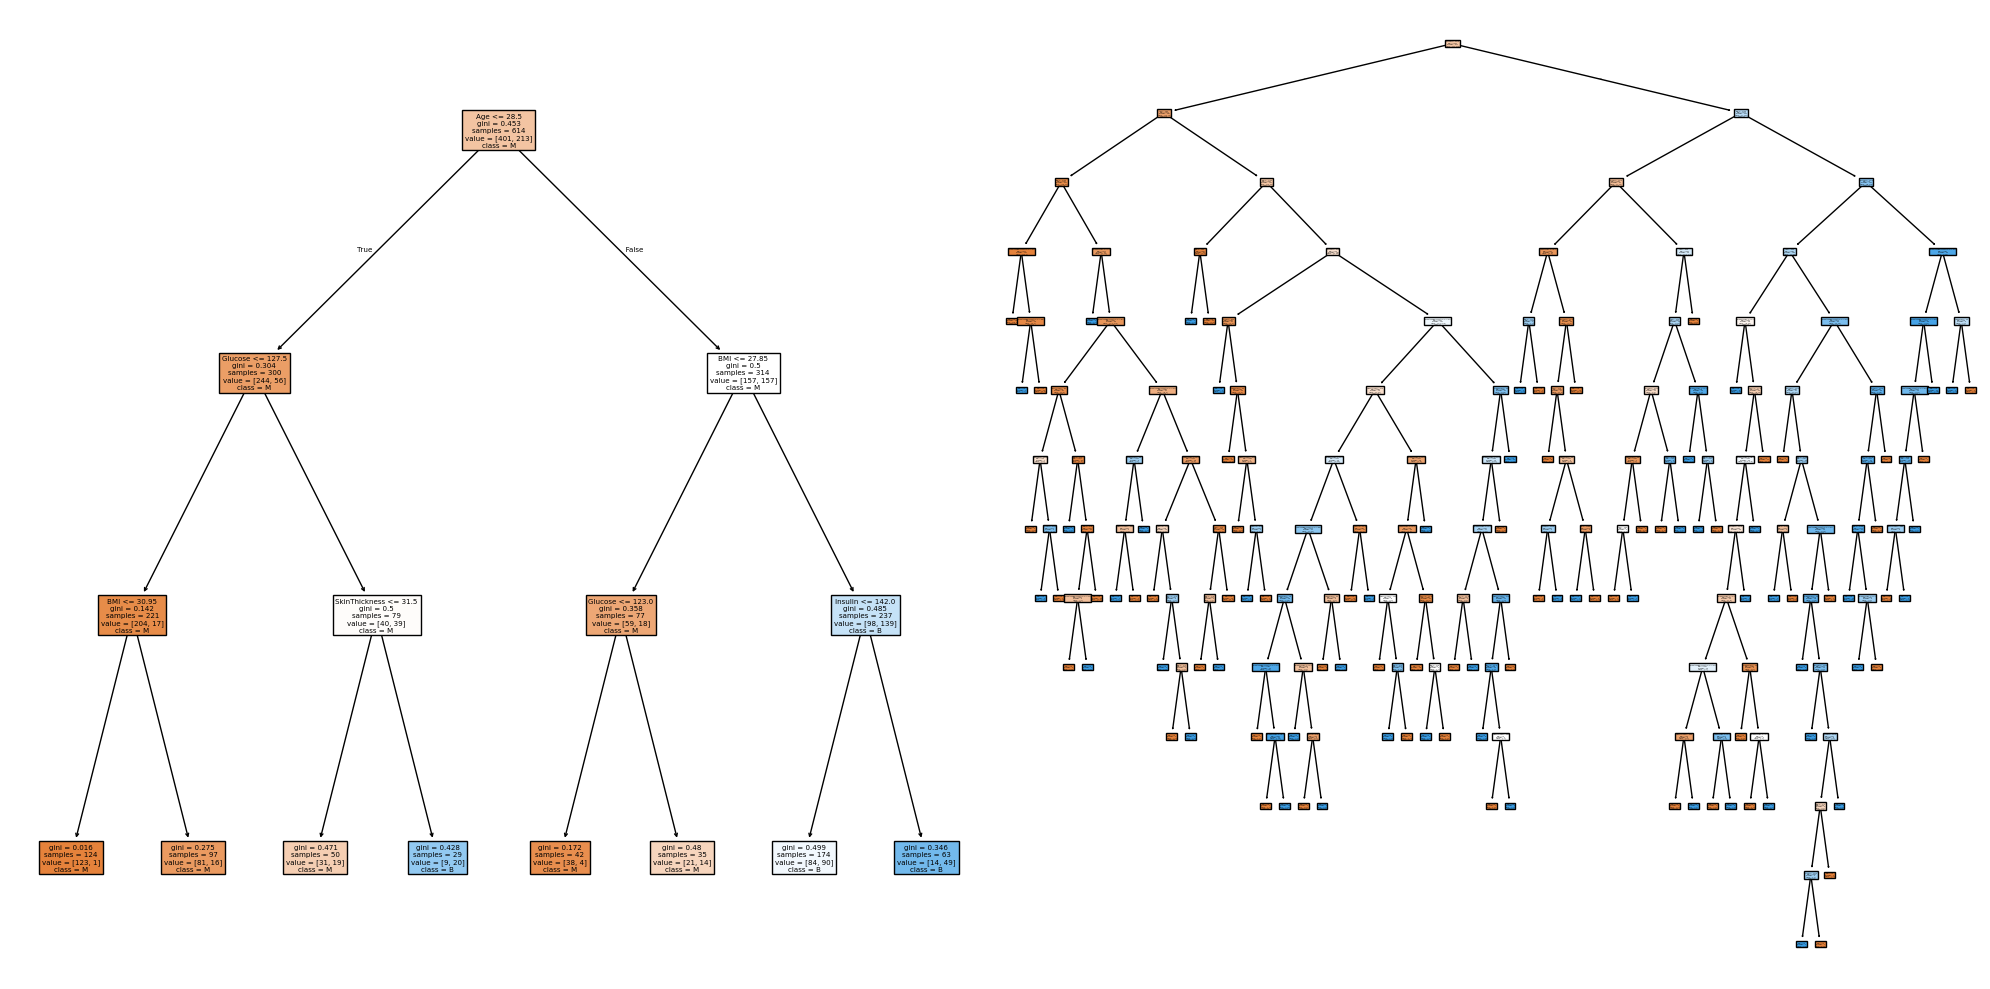

In [30]:
# Para esta comparacion use AI, no podia hacerlos funcionar en el mismo plot a los 2 subplots

plt.figure(figsize=(20, 10))

# Crear subplots sin ejes
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

plot_tree(simple_tree, ax=ax1, feature_names=list(X_train.columns), class_names=['M', 'B'], filled=True)
plot_tree(complex_tree, ax=ax2, feature_names=list(X_train.columns), class_names=['M', 'B'], filled=True)

# Ocultar ejes de ambos subplots
for ax in [ax1, ax2]:
    ax.set_axis_off()

plt.tight_layout() 
plt.show()

In [47]:
text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Age <= 28.50
|   |--- Glucose <= 127.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Glucose >  127.50
|   |   |--- SkinThickness <= 31.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  31.50
|   |   |   |--- class: 1
|--- Age >  28.50
|   |--- BMI <= 27.85
|   |   |--- Glucose <= 123.00
|   |   |   |--- class: 0
|   |   |--- Glucose >  123.00
|   |   |   |--- class: 0
|   |--- BMI >  27.85
|   |   |--- Insulin <= 142.00
|   |   |   |--- class: 1
|   |   |--- Insulin >  142.00
|   |   |   |--- class: 1



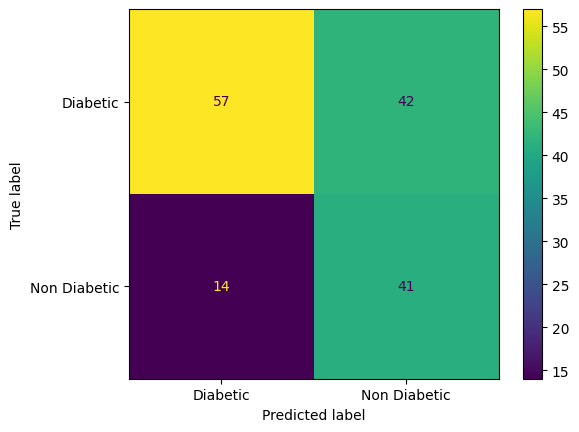

In [42]:
cm = confusion_matrix(y_test, y_pred_test_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Diabetic', 'Non Diabetic'])
disp.plot()

In [32]:
mid_complex_tree = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)
y_pred_train_mid_complex = mid_complex_tree.predict(X_train)
y_pred_test_mid_complex = mid_complex_tree.predict(X_test)

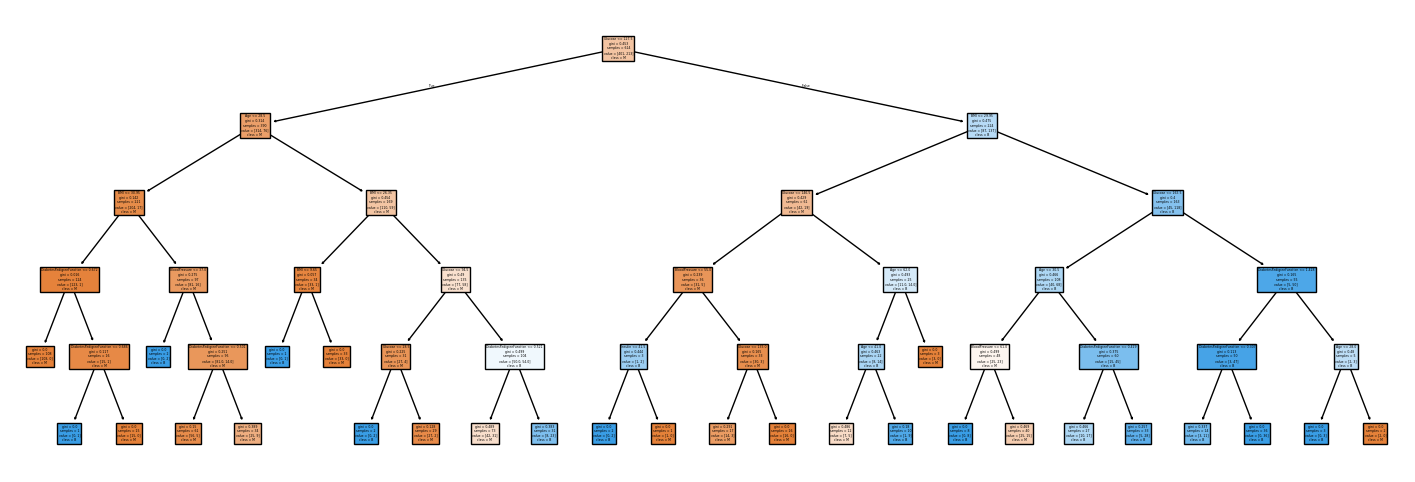

In [33]:
plt.figure(figsize=(18,6))
plot_tree(mid_complex_tree, feature_names=list(X_train.columns), class_names=['M', 'B'], filled=True)
plt.show()

In [34]:
print(f'Complex Tree:')
print(f'''{get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)}
      ''')

print(f'Simple Tree:')
print(f'''{get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)}
      ''')

print(f'Mid Complex Tree:')
print(f'''{get_metrics(y_train, y_test, y_pred_train_mid_complex, y_pred_test_mid_complex)}
      ''')


Complex Tree:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       1.000000  1.000000  1.000000      1.000  1.000000     1.000000
Test        0.746753  0.672269  0.742424      0.625  0.727273     0.757576
Diferencia  0.253247  0.327731  0.257576      0.375  0.272727     0.242424
      
Simple Tree:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       0.737785  0.663883  0.739823   0.597744  0.746479     0.733167
Test        0.636364  0.594203  0.660606   0.493976  0.745455     0.575758
Diferencia  0.101421  0.069680  0.079217   0.103768  0.001024     0.157410
      
Mid Complex Tree:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       0.842020  0.746736  0.802015   0.841176  0.671362     0.932668
Test        0.792208  0.686275  0.757576   0.744681  0.636364     0.878788
Diferencia  0.049812  0.060462  0.044439   0.096496  0.034998     0.053880
      


We can ser that the 'Mid Complex Tree' we have developed, has better metrics than complex and simple trees \
in every single item but Recall. 

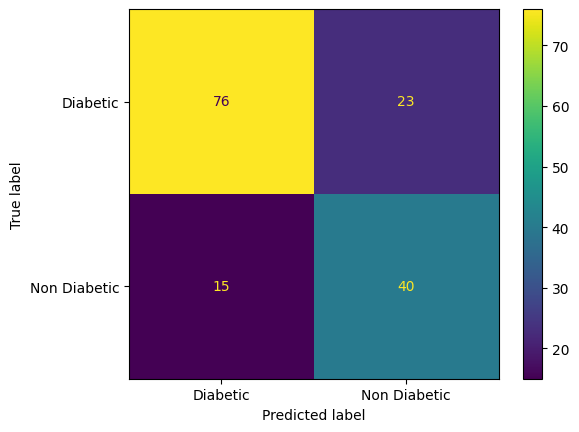

In [43]:
cm = confusion_matrix(y_test, y_pred_test_mid_complex)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Diabetic', 'Non Diabetic'])
disp.plot()

In [48]:
text_representation = export_text(mid_complex_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- SkinThickness <= 8.50
|   |   |   |   |   |   |--- Glucose <= 109.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Glucose >  109.50
|   |   |   |   |   |   |   |--- Glucose <= 123.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Glucose >  123.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- SkinThickness >  8.50
|   |   |

In [57]:
X_reg_tree_train = X_train
y_reg_tree_train = y_train

regression_tree = DecisionTreeRegressor(max_depth=3)
regression_tree.fit(X_reg_tree_train, y_reg_tree_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'Glucose <= 127.5\nsquared_error = 0.227\nsamples = 614\nvalue = 0.347'),
 Text(0.25, 0.625, 'Age <= 28.5\nsquared_error = 0.157\nsamples = 390\nvalue = 0.195'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BMI <= 30.95\nsquared_error = 0.071\nsamples = 221\nvalue = 0.077'),
 Text(0.0625, 0.125, 'squared_error = 0.008\nsamples = 124\nvalue = 0.008'),
 Text(0.1875, 0.125, 'squared_error = 0.138\nsamples = 97\nvalue = 0.165'),
 Text(0.375, 0.375, 'BMI <= 26.35\nsquared_error = 0.227\nsamples = 169\nvalue = 0.349'),
 Text(0.3125, 0.125, 'squared_error = 0.029\nsamples = 34\nvalue = 0.029'),
 Text(0.4375, 0.125, 'squared_error = 0.245\nsamples = 135\nvalue = 0.43'),
 Text(0.75, 0.625, 'BMI <= 29.95\nsquared_error = 0.238\nsamples = 224\nvalue = 0.612'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Glucose <= 146.5\nsquared_error = 0.214\nsamples = 61\nvalue = 0.311'),
 Text(0.5625, 0.125, 'squared_error = 0.12\nsamples = 36\nvalue = 0.139'),
 Text(0.6875, 0.1

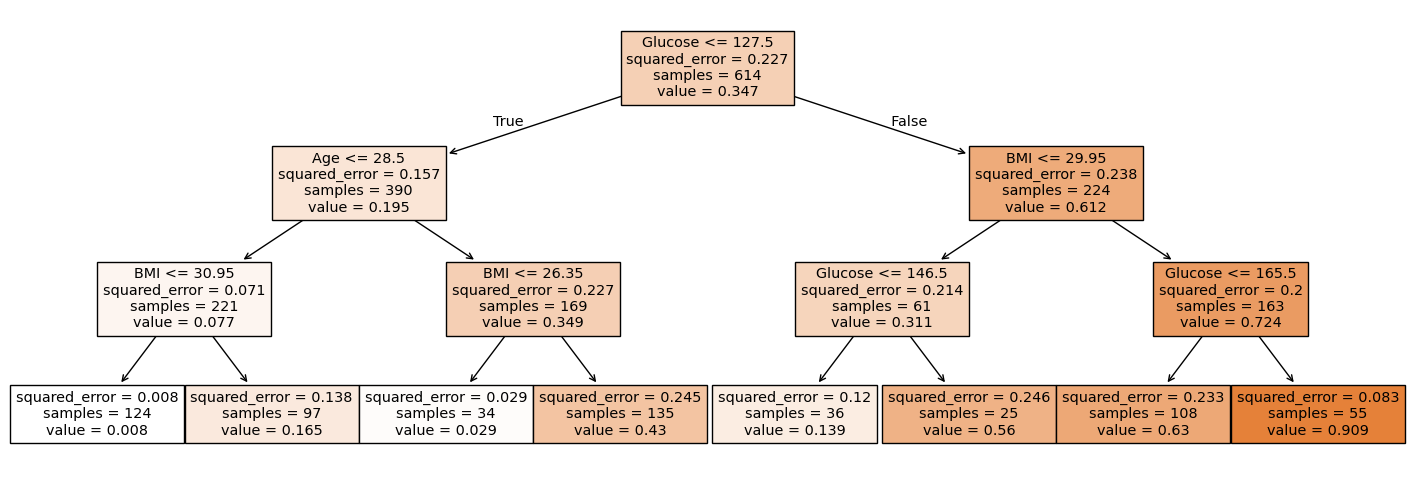

In [55]:
plt.figure(figsize=(18,6))
plot_tree(regression_tree,max_depth=None,filled=True,feature_names=list(X_reg_tree.columns))

In [58]:
y_pred_reg_tree_train = regression_tree.predict(X_train)
y_pred_reg_tree_test = regression_tree.predict(X_test)

In [67]:
def get_metrics_reg(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [72]:
print(f'Complex Tree:')
print(f'''{get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)}
      ''')

print(f'Simple Tree:')
print(f'''{get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)}
      ''')

print(f'Mid Complex Tree:')
print(f'''{get_metrics(y_train, y_test, y_pred_train_mid_complex, y_pred_test_mid_complex)}
      ''')

print(f'Regression Tree:')
print(f'''{get_metrics_reg(y_pred_reg_tree_test, y_test, y_pred_reg_tree_train, y_train)}
      ''')


Complex Tree:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       1.000000  1.000000  1.000000      1.000  1.000000     1.000000
Test        0.746753  0.672269  0.742424      0.625  0.727273     0.757576
Diferencia  0.253247  0.327731  0.257576      0.375  0.272727     0.242424
      
Simple Tree:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       0.737785  0.663883  0.739823   0.597744  0.746479     0.733167
Test        0.636364  0.594203  0.660606   0.493976  0.745455     0.575758
Diferencia  0.101421  0.069680  0.079217   0.103768  0.001024     0.157410
      
Mid Complex Tree:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       0.944625  0.919811  0.937796   0.924171  0.915493     0.960100
Test        0.753247  0.677966  0.747475   0.634921  0.727273     0.767677
Diferencia  0.191379  0.241845  0.190322   0.289250  0.188220     0.192423
      
Regression Tree:
                 

Conclusion: 
- Complex Tree: we can see there's some overfitting, with high performance in train subset but poor generalization.
- Simple Tree: better balance between bias and variance, but lower overall accuracy.
- Mid Complex Tree: an intermediate option, with better generalization than Complex Tree but lacking the stability of the Simple Tree.
- Regression Tree: it shows significant errors, specially in MAPE, which may indicate some issues with data scaling, or the need for adjust the model or preprocessing.

